In [1]:
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt
import sys
sys.path.append('/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/src/utils')

import WheelerKiladis_util as wk 
from scipy.signal import windows

%load_ext autoreload
%autoreload 2

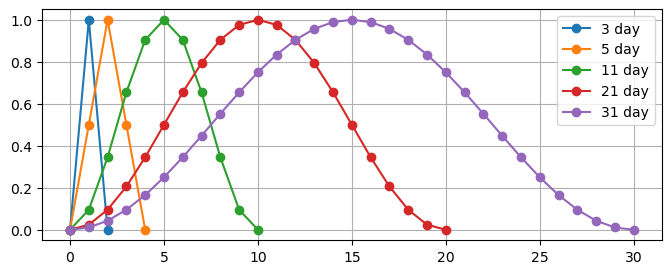

In [2]:
fig, ax = plt.subplots(1,1, figsize=(8,3))
ax.plot(xr.DataArray(windows.hann(3), dims=['window']),'o-', label='3 day')
ax.plot(xr.DataArray(windows.hann(5), dims=['window']),'o-', label='5 day')
ax.plot(xr.DataArray(windows.hann(11), dims=['window']),'o-', label='11 day')
ax.plot(xr.DataArray(windows.hann(21), dims=['window']),'o-', label='21 day')
ax.plot(xr.DataArray(windows.hann(31), dims=['window']),'o-', label='31 day')
plt.grid()
plt.legend(fontsize=10)

In [3]:
flg = 'hann'
wgt = True 

fn = '/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/data/raw/olr.day.noaa.2x2.nc'
ds = xr.open_dataset(fn, engine='netcdf4')

olr = ds['olr'].sel(time=slice('1980-01-01', '2001-12-31'))
sym3_minus, _ = wk.spacetime_power_runningavg_minus(olr, segsize=96, noverlap=60, spd=1, lat_lim=10, remove_low=True, sigtest=False, window_len=3, weighted=wgt)


coordinates:  ('time', 'lat', 'lon', 'segments')
size of x_roll_sym_asym:  (221, 11, 180, 96)


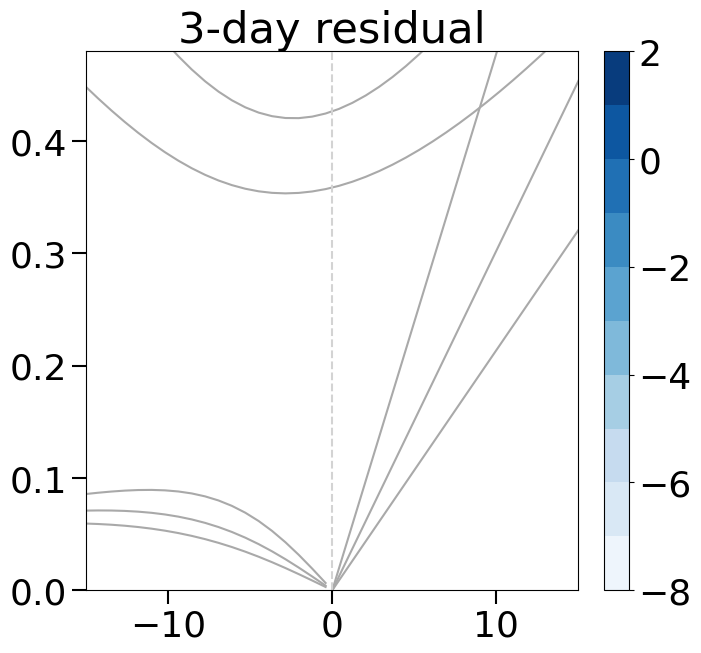

In [5]:
wk.wk_plot_sym(sym3_minus, tlt='3-day residual', logflg=True, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=True, vmax=2, vmin=-8, cmapflg='Blues', contourlevels=np.arange(0, 2.5, 1))


In [50]:
fn = '/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/notebooks/analysis/olr_runningavghann_spectra.nc'
ds = xr.open_dataset(fn) 
sym = ds['sym'] 
background = ds['background']
sym21 = ds['sym21']
sym31 = ds['sym31']
sym5 = ds['sym5']
sym11 = ds['sym11']
sym21_minus = ds['sym21_minus']
sym31_minus = ds['sym31_minus']
sym5_minus = ds['sym5_minus']
sym11_minus = ds['sym11_minus']

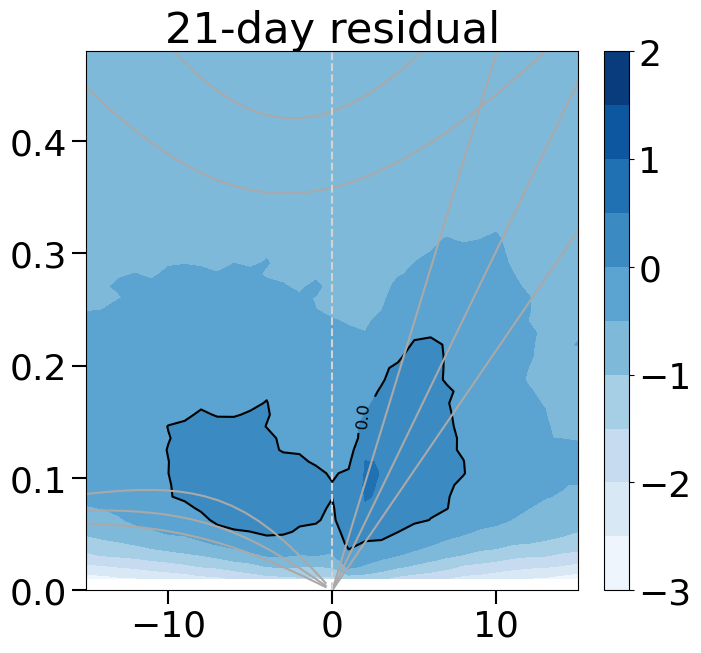

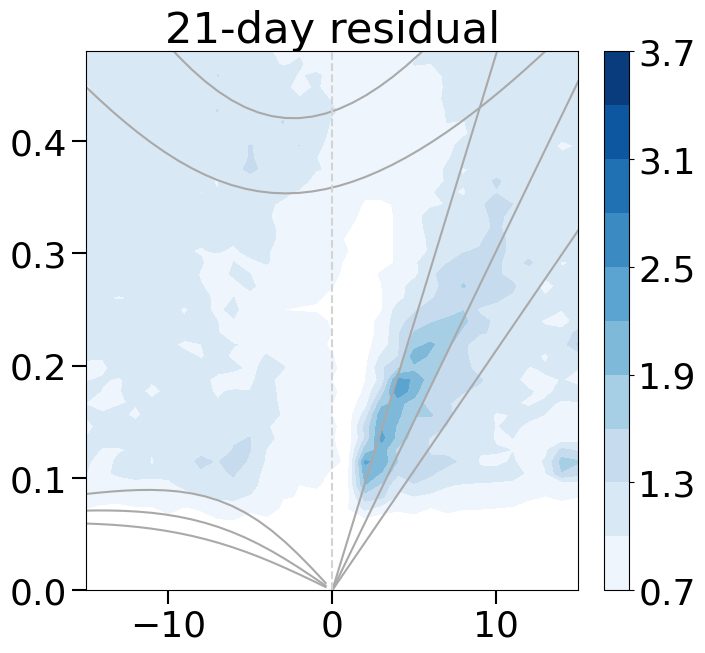

In [51]:
wk.wk_plot_sym(sym21_minus, tlt='21-day residual', logflg=True, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=True, vmax=2, vmin=-3, cmapflg='Blues', contourlevels=np.arange(0, 2.5, 1))
wk.wk_plot_sym(sym21_minus/background, tlt='21-day residual', logflg=False, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=True, vmax=3.7, vmin=0.7, cmapflg='Blues')


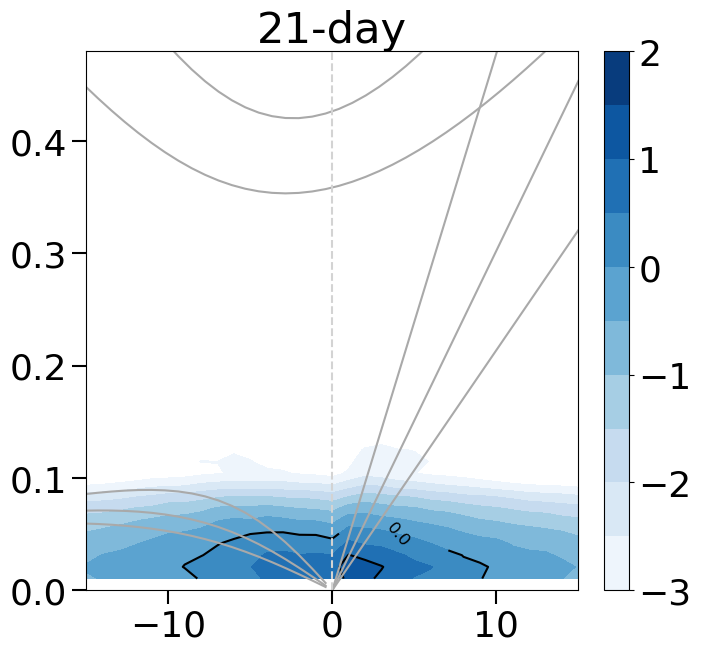

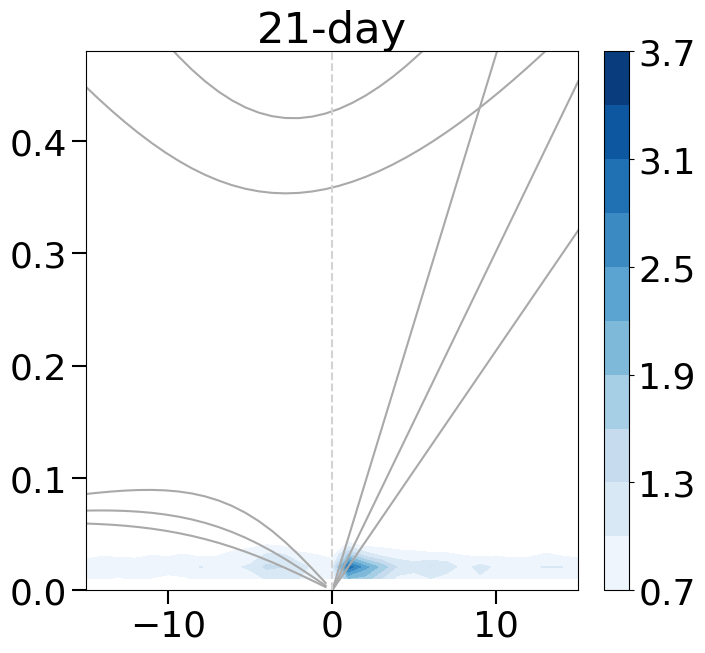

In [52]:
wk.wk_plot_sym(sym21, tlt='21-day', logflg=True, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=True, vmax=2, vmin=-3, cmapflg='Blues', contourlevels=np.arange(0, 2.5, 1))
wk.wk_plot_sym(sym21/background, tlt='21-day', logflg=False, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=True, vmax=3.7, vmin=0.7, cmapflg='Blues')


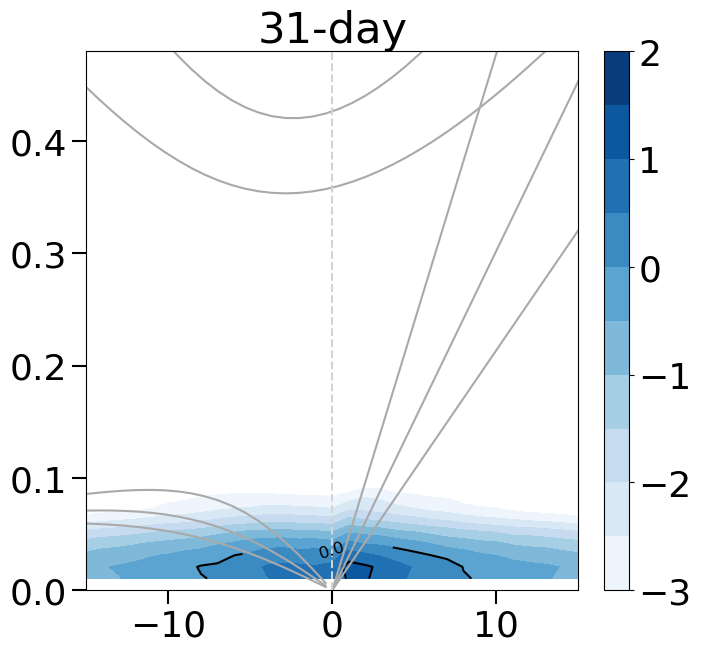

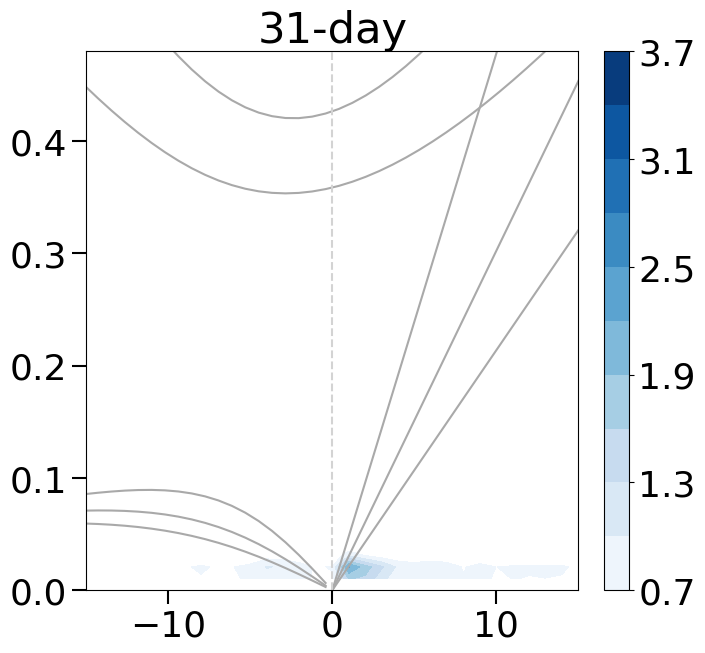

In [53]:
wk.wk_plot_sym(sym31, tlt='31-day', logflg=True, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=True, vmax=2, vmin=-3, cmapflg='Blues', contourlevels=np.arange(0, 2.5, 1))
wk.wk_plot_sym(sym31/background, tlt='31-day', logflg=False, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=True, vmax=3.7, vmin=0.7, cmapflg='Blues')


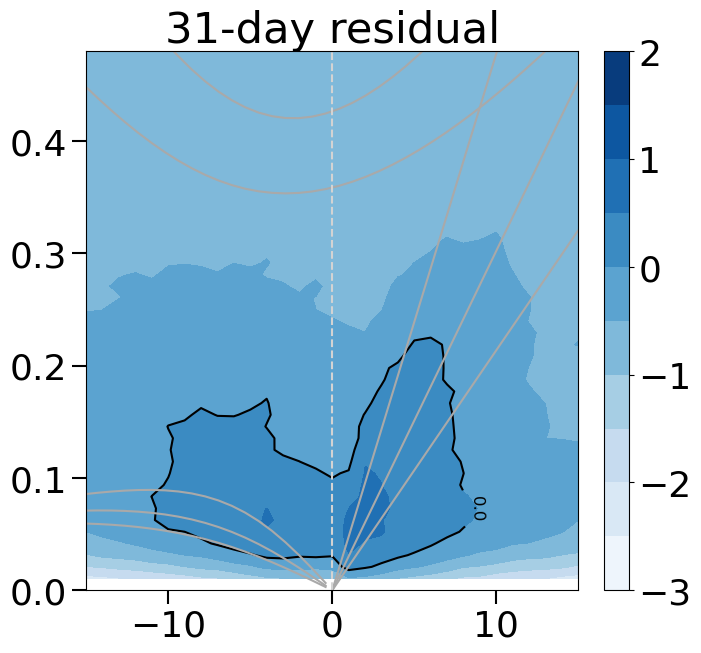

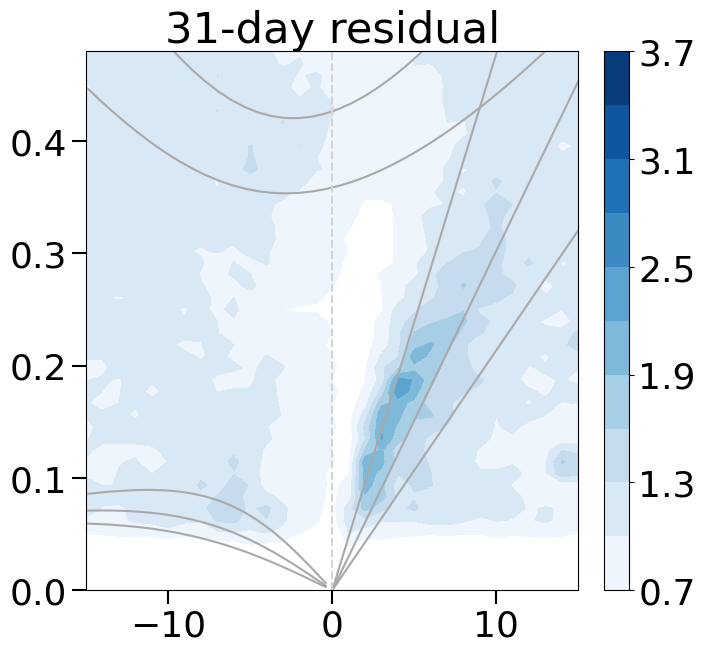

In [54]:
wk.wk_plot_sym(sym31_minus, tlt='31-day residual', logflg=True, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=True, vmax=2, vmin=-3, cmapflg='Blues', contourlevels=np.arange(0, 2.5, 1))
wk.wk_plot_sym(sym31_minus/background, tlt='31-day residual', logflg=False, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=True, vmax=3.7, vmin=0.7, cmapflg='Blues')


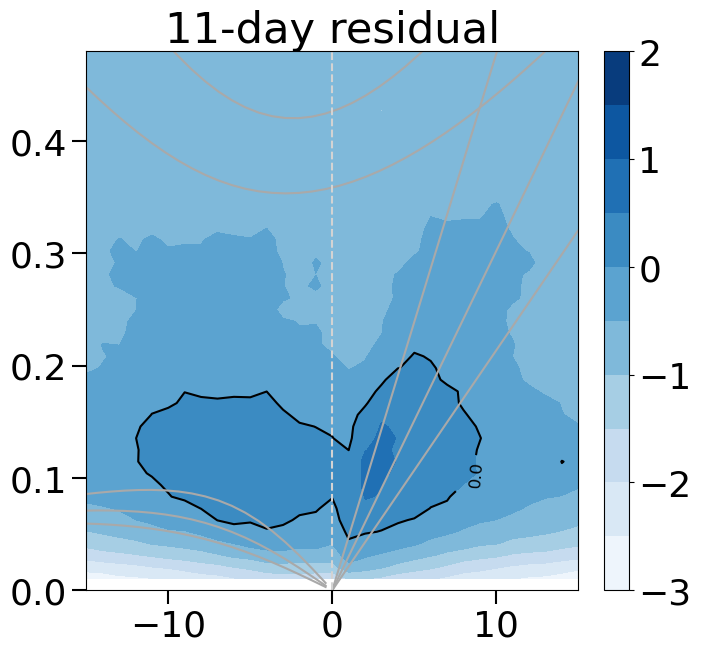

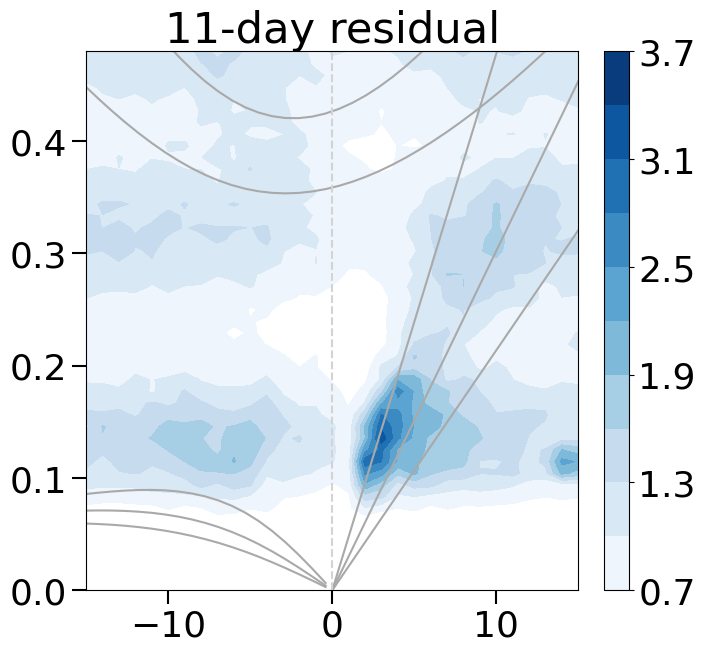

In [36]:
wk.wk_plot_sym(sym11_minus, tlt='11-day residual', logflg=True, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=True, vmax=2, vmin=-3, cmapflg='Blues', contourlevels=np.arange(0, 2.5, 1))
wk.wk_plot_sym(sym11_minus/background, tlt='11-day residual', logflg=False, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=True, vmax=3.7, vmin=0.7, cmapflg='Blues')


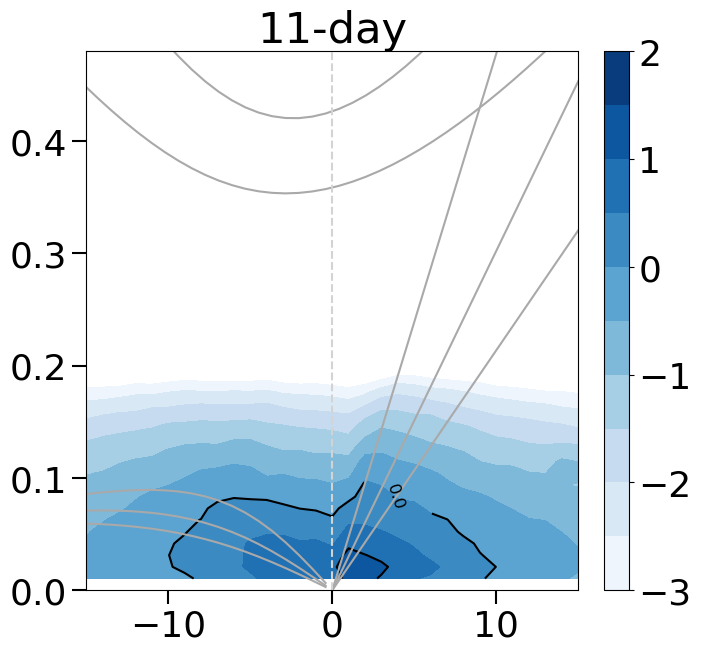

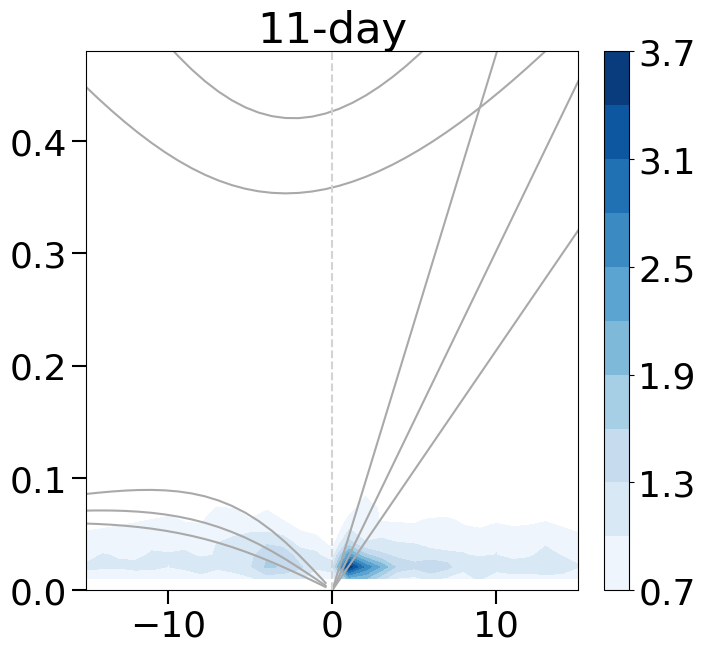

In [28]:
wk.wk_plot_sym(sym11, tlt='11-day', logflg=True, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=True, vmax=2, vmin=-3, cmapflg='Blues', contourlevels=np.arange(0, 2.5, 1))
wk.wk_plot_sym(sym11/background, tlt='11-day', logflg=False, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=True, vmax=3.7, vmin=0.7, cmapflg='Blues')


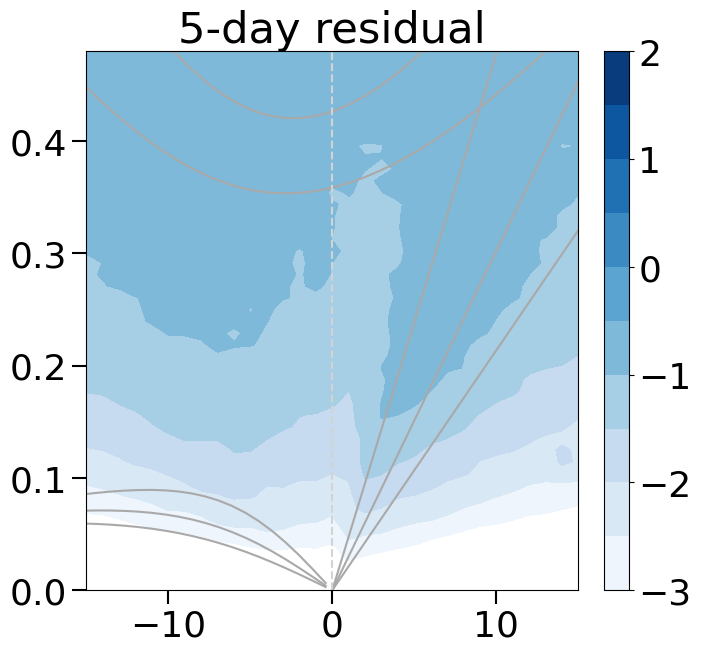

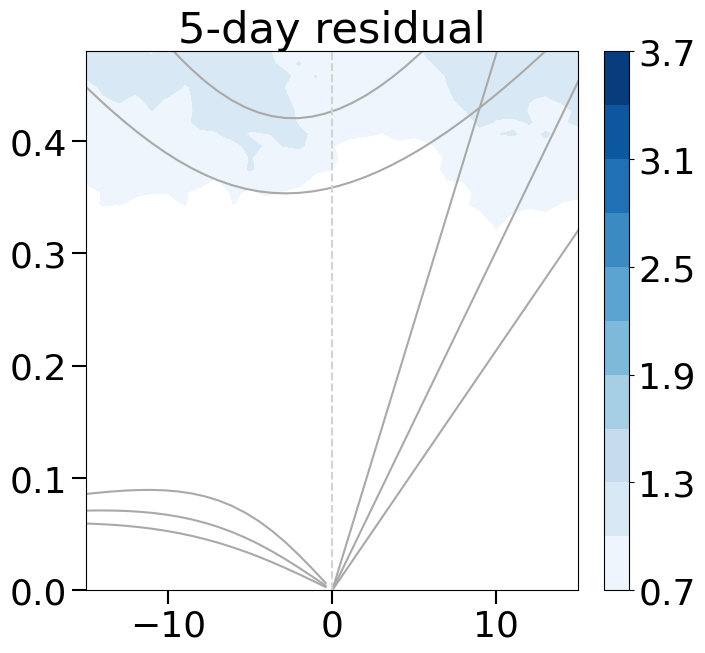

In [34]:
wk.wk_plot_sym(sym5_minus, tlt='5-day residual', logflg=True, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=True, vmax=2, vmin=-3, cmapflg='Blues', contourlevels=np.arange(0, 2.5, 1))
wk.wk_plot_sym(sym5_minus/background, tlt='5-day residual', logflg=False, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=True, vmax=3.7, vmin=0.7, cmapflg='Blues')


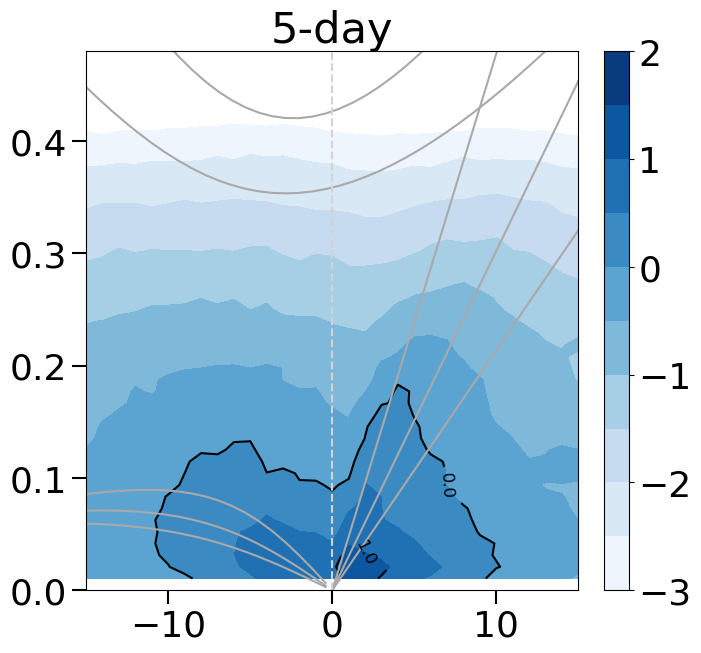

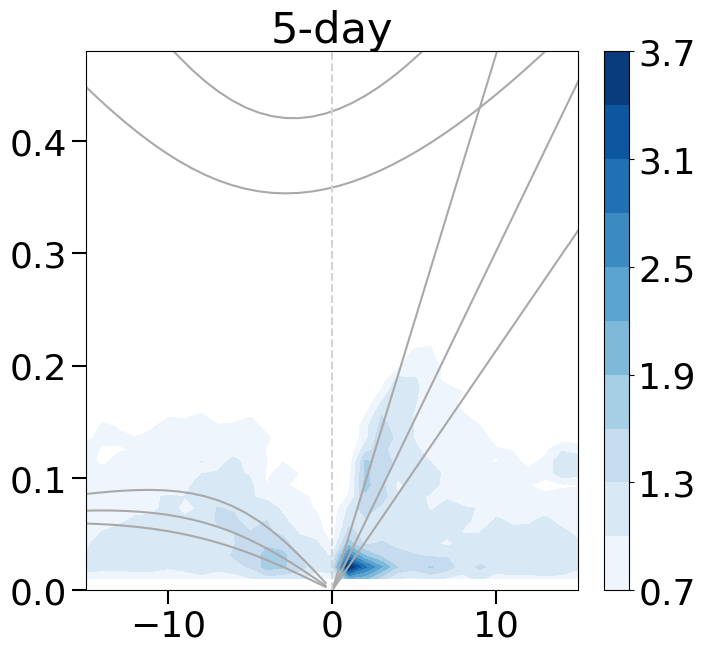

In [29]:
wk.wk_plot_sym(sym5, tlt='5-day', logflg=True, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=True, vmax=2, vmin=-3, cmapflg='Blues', contourlevels=np.arange(0, 2.5, 1))
wk.wk_plot_sym(sym5/background, tlt='5-day', logflg=False, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=True, vmax=3.7, vmin=0.7, cmapflg='Blues')


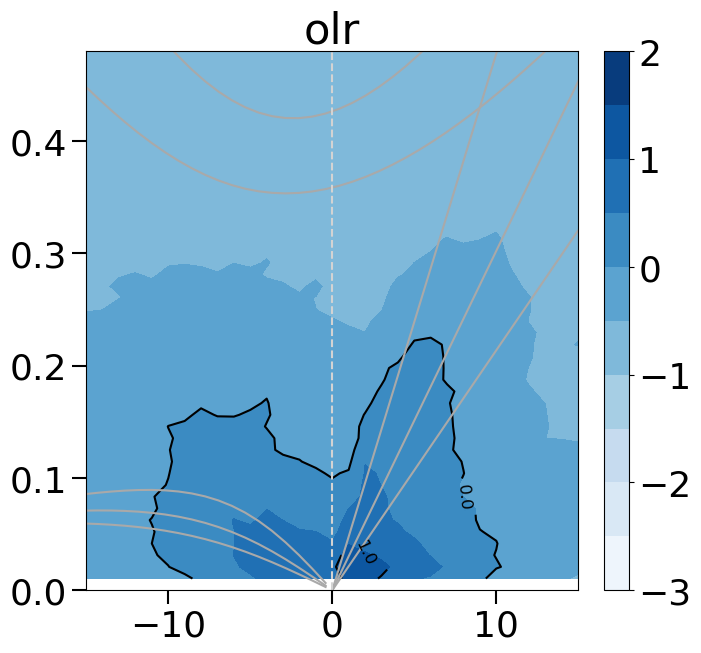

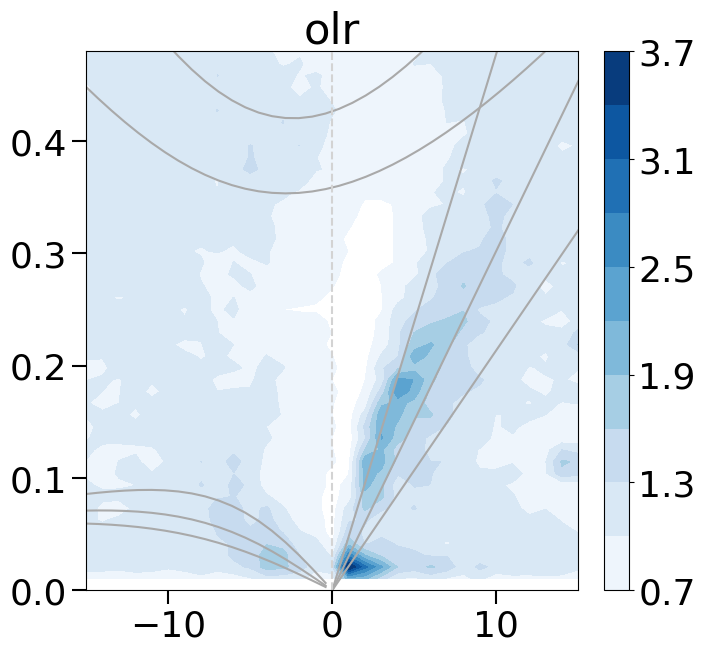

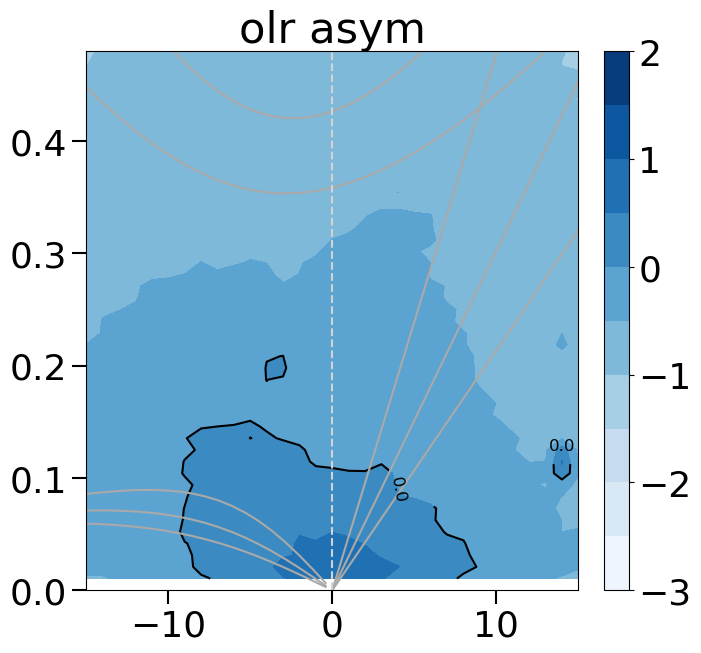

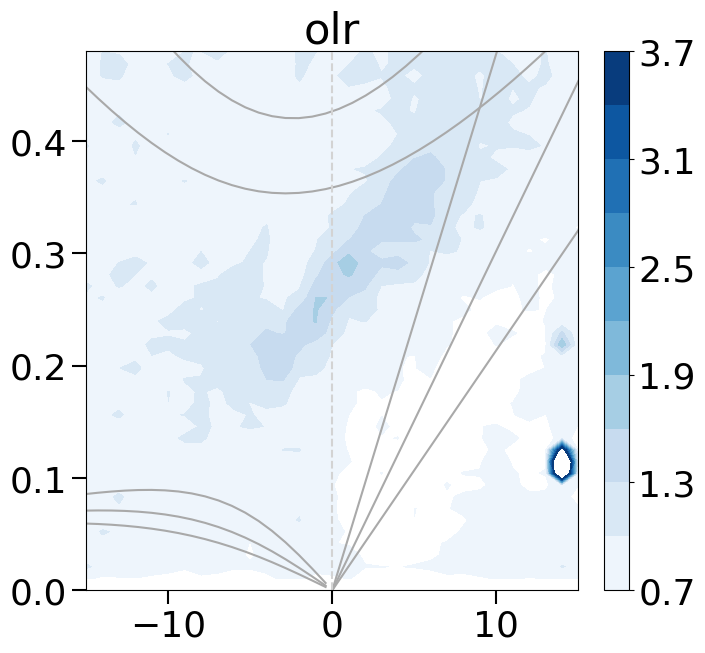

In [33]:
wk.wk_plot_sym(sym, tlt='olr', logflg=True, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=True, vmax=2, vmin=-3, cmapflg='Blues', contourlevels=np.arange(0, 2.5, 1))
wk.wk_plot_sym(sym/background, tlt='olr', logflg=False, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=True, vmax=3.7, vmin=0.7, cmapflg='Blues')
wk.wk_plot_sym(ds['asym'], tlt='olr asym', logflg=True, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=True, vmax=2, vmin=-3, cmapflg='Blues', contourlevels=np.arange(0, 2.5, 1))
wk.wk_plot_sym(ds['asym']/background, tlt='olr', logflg=False, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=True, vmax=3.7, vmin=0.7, cmapflg='Blues')


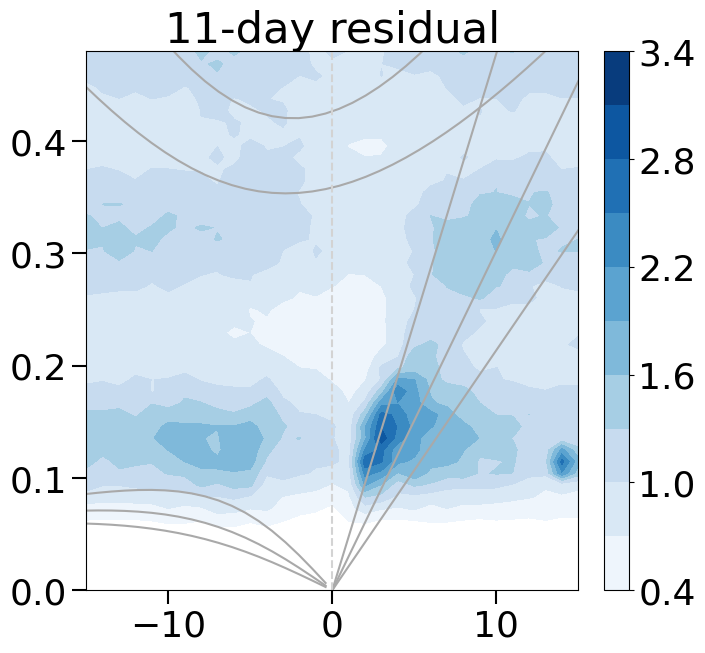

In [33]:
# wk.wk_plot_sym(sym5_minus, tlt='5-day residual', logflg=True, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=True, vmax=2, vmin=-3, cmapflg='Blues', contourlevels=np.arange(0, 2.5, 1))
wk.wk_plot_sym(sym11_minus/background, tlt='11-day residual', logflg=False, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=True, vmax=3.4, vmin=0.4, cmapflg='Blues')


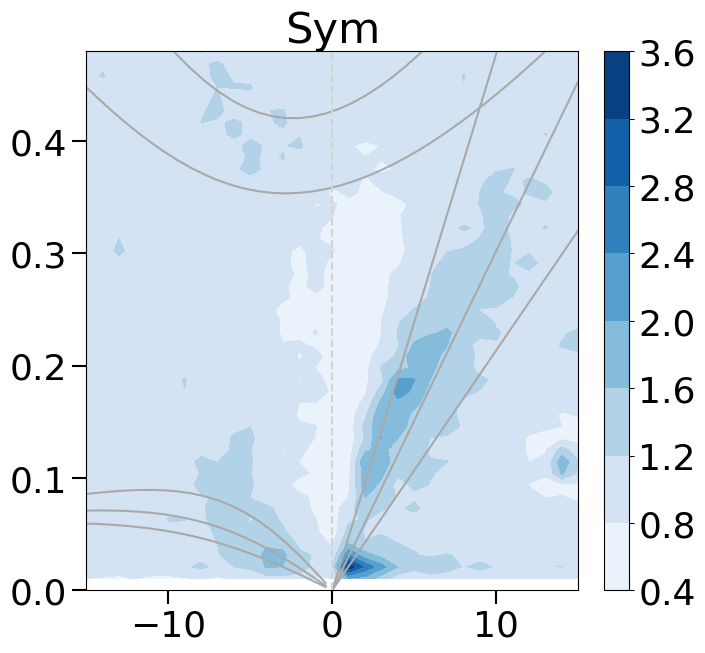

In [17]:
wk.wk_plot_sym(sym/background, tlt='Sym', logflg=False, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=False, vmax=None, vmin=None, cmapflg='Blues')


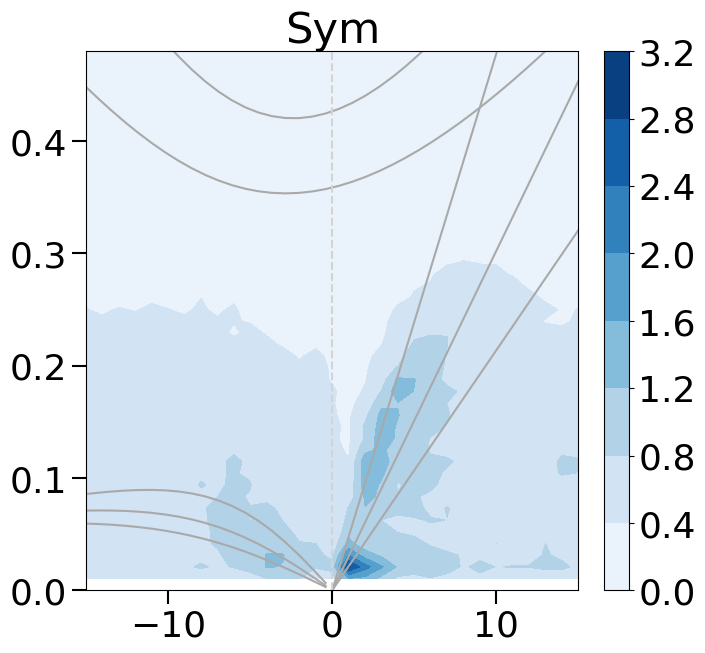

In [16]:
wk.wk_plot_sym(sym2/background, tlt='Sym', logflg=False, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=False, vmax=None, vmin=None, cmapflg='Blues')


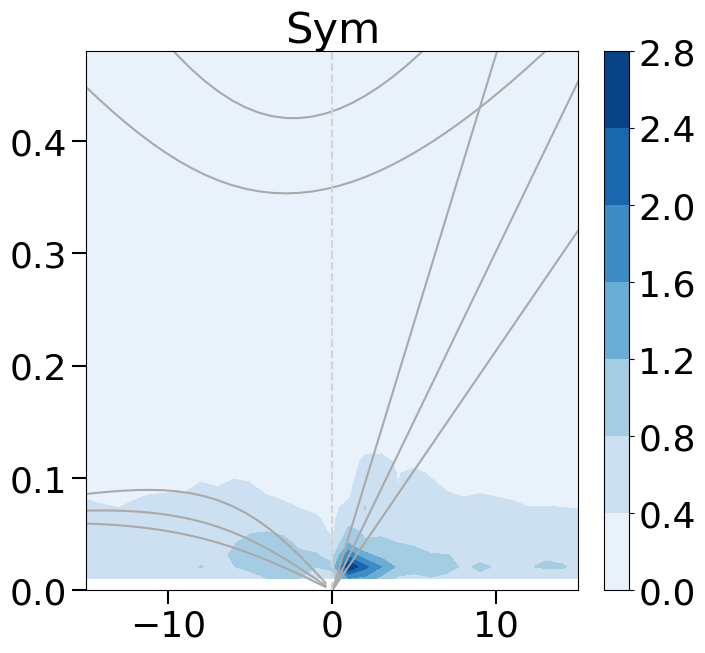

In [18]:
wk.wk_plot_sym(sym5/background, tlt='Sym', logflg=False, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=False, vmax=None, vmin=None, cmapflg='Blues')


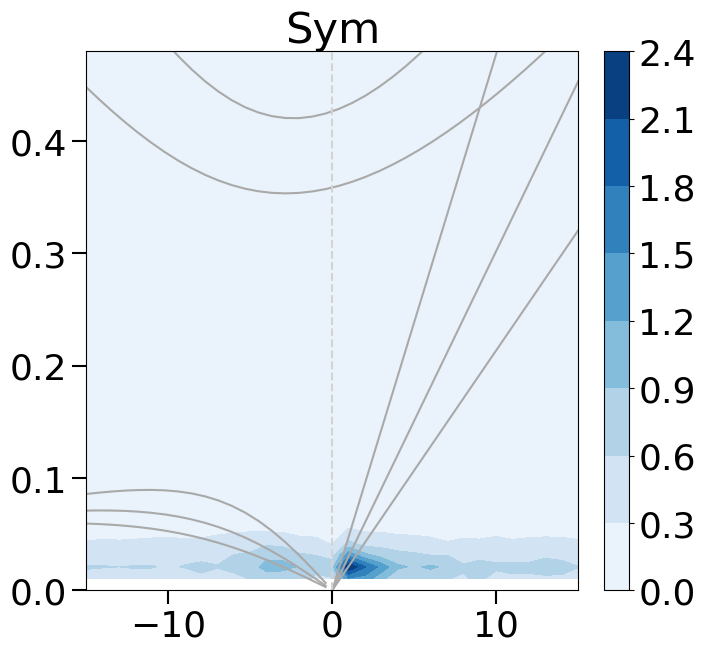

In [19]:
wk.wk_plot_sym(sym11/background, tlt='Sym', logflg=False, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=False, vmax=None, vmin=None, cmapflg='Blues')


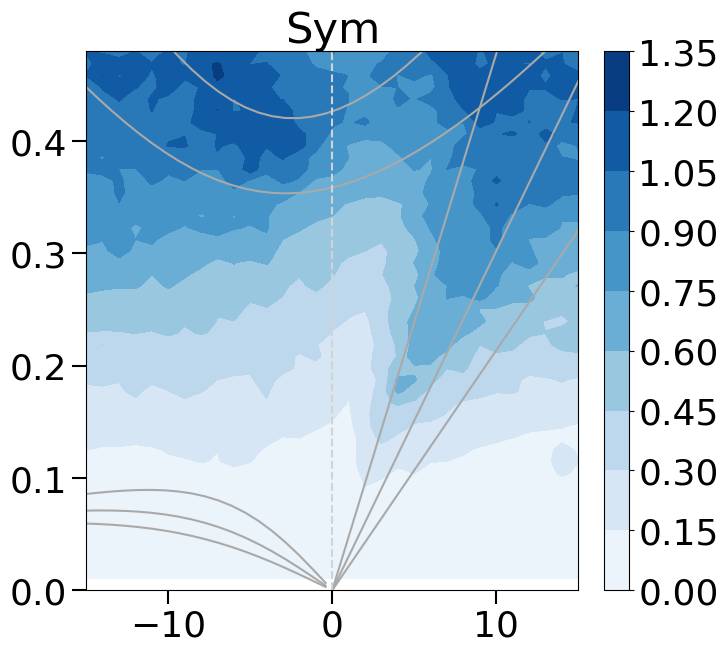

In [21]:
wk.wk_plot_sym(sym2_minus/background, tlt='Sym', logflg=False, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=False, vmax=None, vmin=None, cmapflg='Blues')


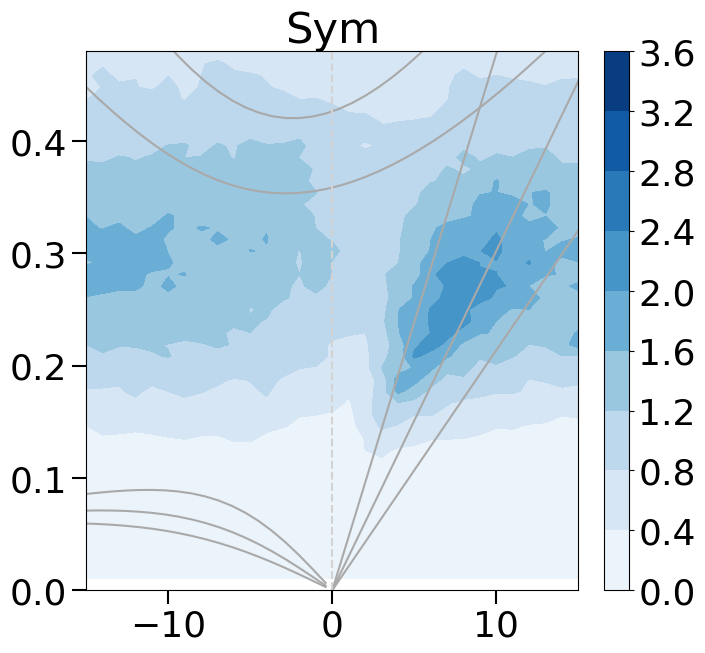

In [22]:
wk.wk_plot_sym(sym5_minus/background, tlt='Sym', logflg=False, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=False, vmax=None, vmin=None, cmapflg='Blues')


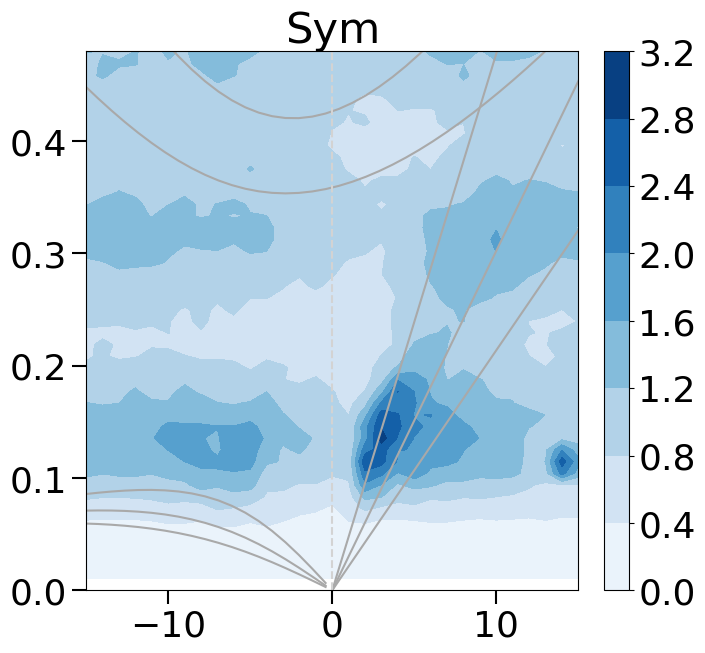

In [20]:
wk.wk_plot_sym(sym11_minus/background, tlt='Sym', logflg=False, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=False, vmax=None, vmin=None, cmapflg='Blues')


In [ ]:
fn = '/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/data/raw/olr.day.noaa.2x2.nc'
ds = xr.open_dataset(fn, engine='netcdf4')
olr = ds['olr'].sel(time=slice('1980-01-01', '2001-12-31'))
# ds 

In [3]:
olr = ds['olr'].sel(time=slice('1980-01-01', '2001-12-31'))

In [8]:
# 3 min
sym2, asym2 = wk.spacetime_power_runningavg(olr, segsize=96, noverlap=60, spd=1, lat_lim=15, remove_low=True, sigtest=False, window_len=2)

coordinates:  ('time', 'lat', 'lon', 'segments')
size of x_roll_sym_asym:  (221, 15, 180, 96)


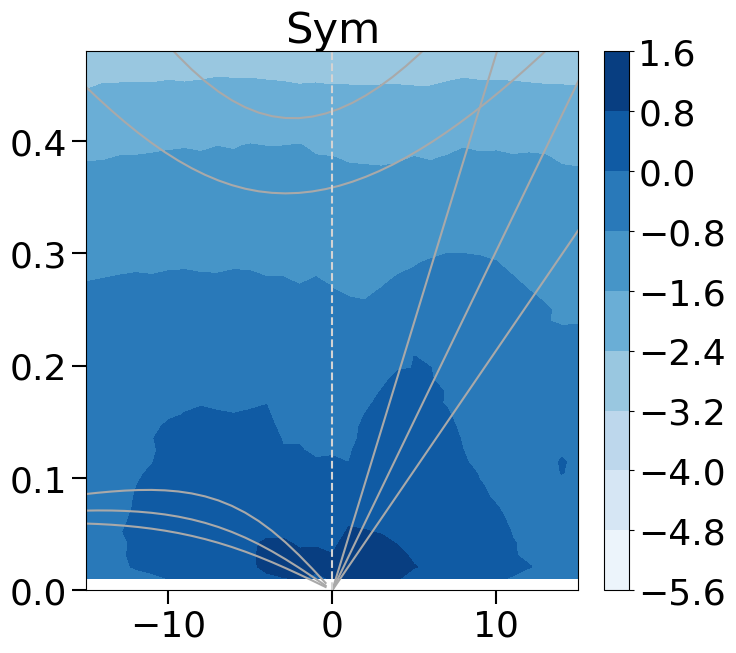

In [9]:
wk.wk_plot_sym(sym2, tlt='Sym', logflg=True, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=False, vmax=None, vmin=None, cmapflg='Blues')


In [5]:
# 3 min
sym5, asym5 = wk.spacetime_power_runningavg(olr, segsize=96, noverlap=60, spd=1, lat_lim=15, remove_low=True, sigtest=False, window_len=5)

coordinates:  ('time', 'lat', 'lon', 'segments')
size of x_roll_sym_asym:  (221, 15, 180, 96)


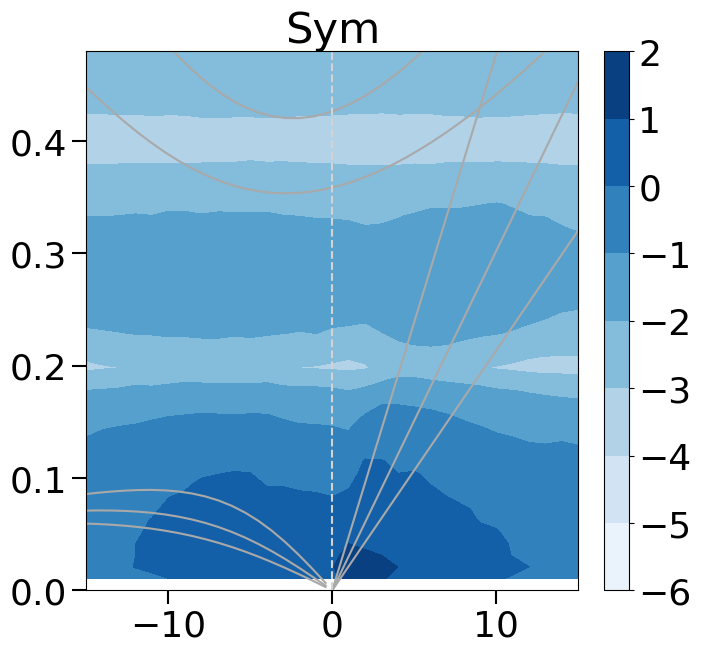

In [6]:
wk.wk_plot_sym(sym5, tlt='Sym', logflg=True, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=False, vmax=None, vmin=None, cmapflg='Blues')


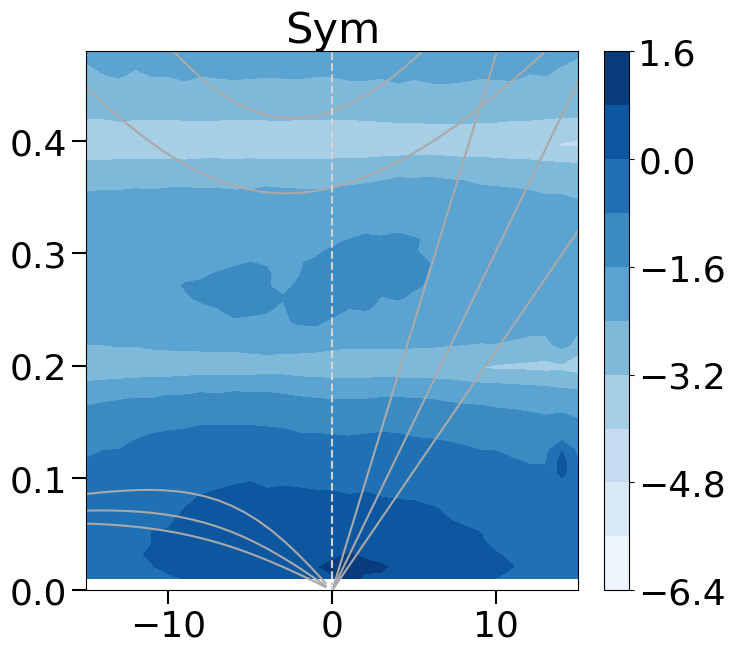

In [7]:
wk.wk_plot_sym(asym5, tlt='Sym', logflg=True, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=False, vmax=None, vmin=None, cmapflg='Blues')


In [10]:
# 3 min
sym5_minus, _ = wk.spacetime_power_runningavg_minus(olr, segsize=96, noverlap=60, spd=1, lat_lim=15, remove_low=True, sigtest=False, window_len=5)

coordinates:  ('time', 'lat', 'lon', 'segments')
size of x_roll_sym_asym:  (221, 15, 180, 96)


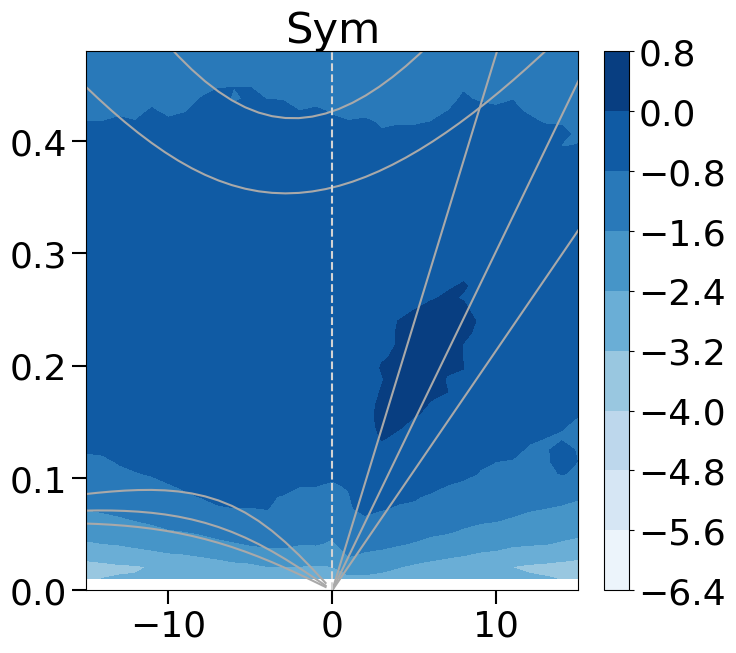

In [11]:
wk.wk_plot_sym(sym5_minus, tlt='Sym', logflg=True, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=False, vmax=None, vmin=None, cmapflg='Blues')


In [ ]:

olr_2 = olr.rolling(time=2, center=True).mean()
olr_5 = olr.rolling(time=5, center=True).mean()
olr_10 = olr.rolling(time=10, center=True).mean()
olr_20 = olr.rolling(time=20, center=True).mean()
olr_30 = olr.rolling(time=30, center=True).mean()


In [6]:
results = {}
for data, name in zip([olr, olr_2, olr_5, olr_10, olr_20, olr_30], 
                      ['olr', 'olr_2', 'olr_5', 'olr_10', 'olr_20', 'olr_30']):
    sym, asym = wk.spacetime_power(data, segsize=96, noverlap=60, spd=1, lat_lim=15, remove_low=True, sigtest=False)
    background = wk.power_bag(wk.power_avg(sym, asym))
    
    # Store results in the dictionary
    results[f'sym_{name}'] = sym
    results[f'asym_{name}'] = asym
    results[f'background_{name}'] = background

import pickle

with open('./analysis/filtered_OLR_spectra.pkl', 'wb') as f:
    pickle.dump(results, f)

coordinates:  ('time', 'lat', 'lon', 'segments')
size of x_roll_sym_asym:  (434, 15, 180, 96)


: 

In [ ]:
wk.wk_plot_sym(results[f'sym_olr'], tlt='Sym', logflg=True, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=False, vmax=None, vmin=None, cmapflg='Blues')
wk.wk_plot_sym(results[f'sym_olr_2'], tlt='Sym', logflg=True, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=False, vmax=None, vmin=None, cmapflg='Blues')
wk.wk_plot_sym(results[f'sym_olr_5'], tlt='Sym', logflg=True, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=False, vmax=None, vmin=None, cmapflg='Blues')
wk.wk_plot_sym(results[f'sym_olr_10'], tlt='Sym', logflg=True, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=False, vmax=None, vmin=None, cmapflg='Blues')
wk.wk_plot_sym(results[f'sym_olr_20'], tlt='Sym', logflg=True, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=False, vmax=None, vmin=None, cmapflg='Blues')
wk.wk_plot_sym(results[f'sym_olr_30'], tlt='Sym', logflg=True, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=False, vmax=None, vmin=None, cmapflg='Blues')


In [14]:
olr_smooth5 = olr.rolling(time=5, center=True).mean()
smooth_sym5, smooth_asym5 = wk.spacetime_power(olr_smooth5, segsize=96, noverlap=60, spd=1, lat_lim=15, remove_low=True, sigtest=False)
background5 = wk.power_bag(wk.power_avg(smooth_sym5, smooth_asym5))
sym_norm5 = smooth_sym5 / background5
asym_norm5 = smooth_asym5 / background5

coordinates:  ('time', 'lat', 'lon', 'segments')
size of x_roll_sym_asym:  (434, 15, 180, 96)


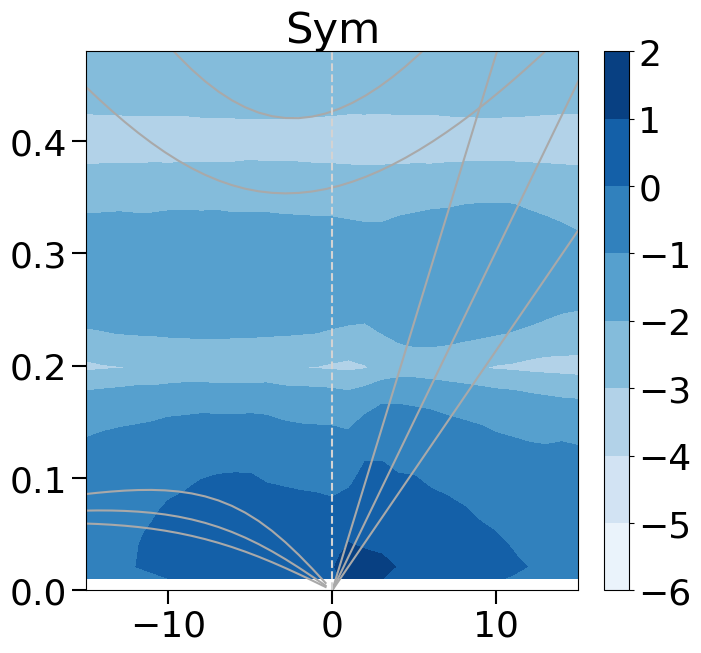

In [15]:
wk.wk_plot_sym(smooth_sym5, tlt='Sym', logflg=True, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=False, vmax=None, vmin=None, cmapflg='Blues')


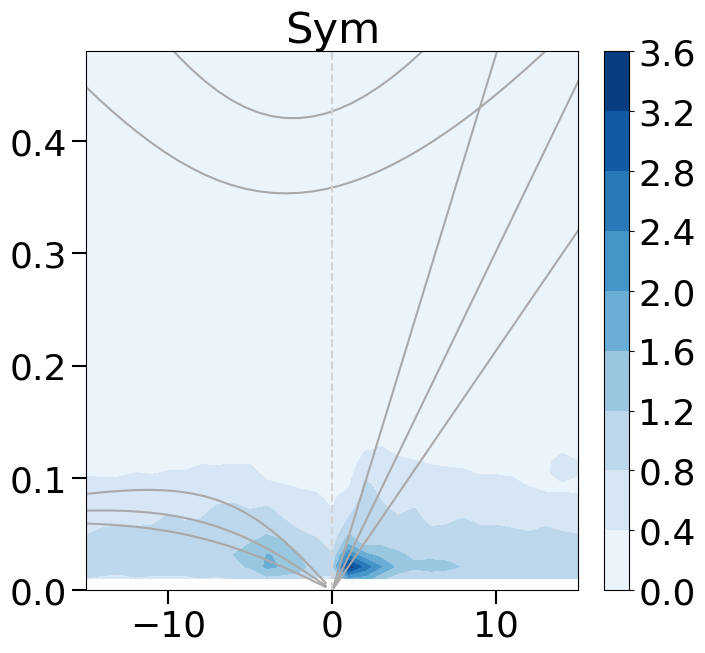

In [18]:
wk.wk_plot_sym(smooth_sym5 / background, tlt='Sym', logflg=False, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=False, vmax=None, vmin=None, cmapflg='Blues')


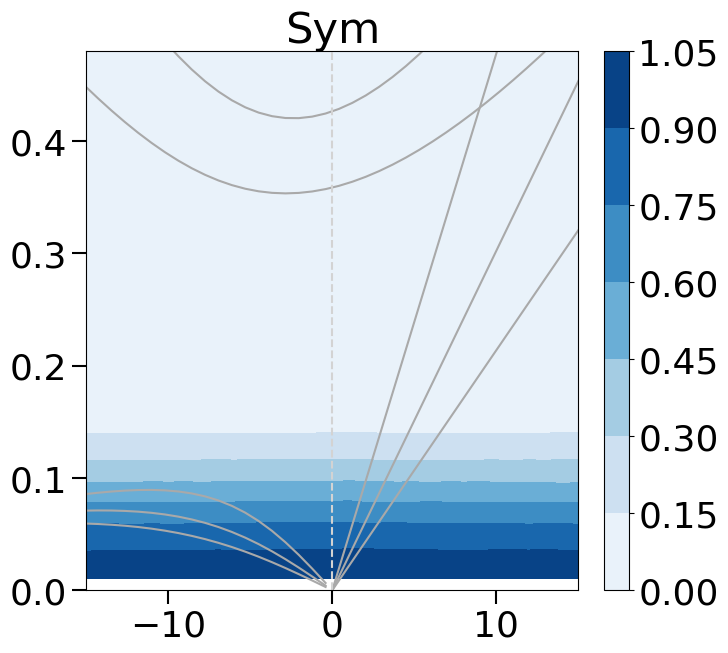

In [16]:
wk.wk_plot_sym(smooth_sym5/smooth_sym, tlt='Sym', logflg=False, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=False, vmax=None, vmin=None, cmapflg='Blues')


In [ ]:
smooth_sym, smooth_asym, background, sym_norm, asym_norm, _ , _ = wk.wk_analysis(olr, segsize=96, noverlap=60, spd=1, lat_lim=15,sigtest=True)

# 5min 

coordinates:  ('time', 'lat', 'lon', 'segments')
size of x_roll_sym_asym:  (434, 15, 180, 96)
(434, 179, 47)
(179, 47)


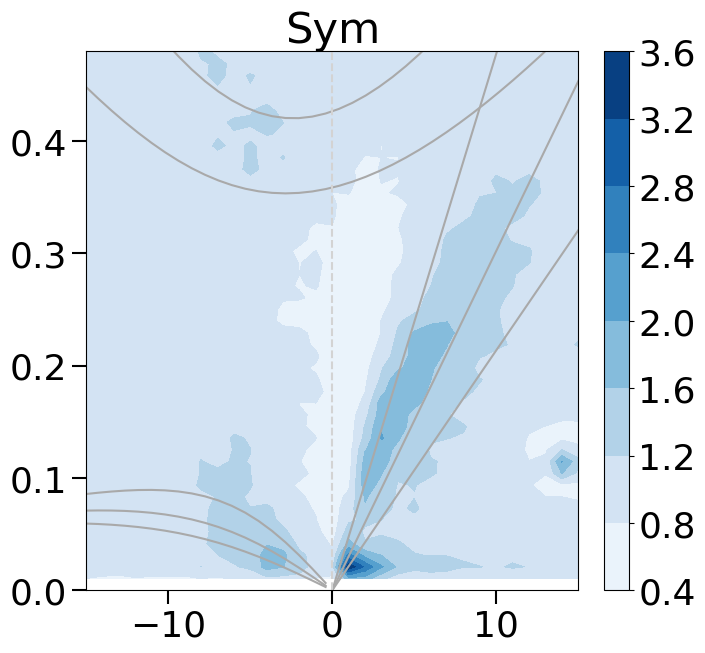

In [13]:
wk.wk_plot_sym(sym_norm, tlt='Sym', logflg=False, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=False, vmax=None, vmin=None, cmapflg='Blues')


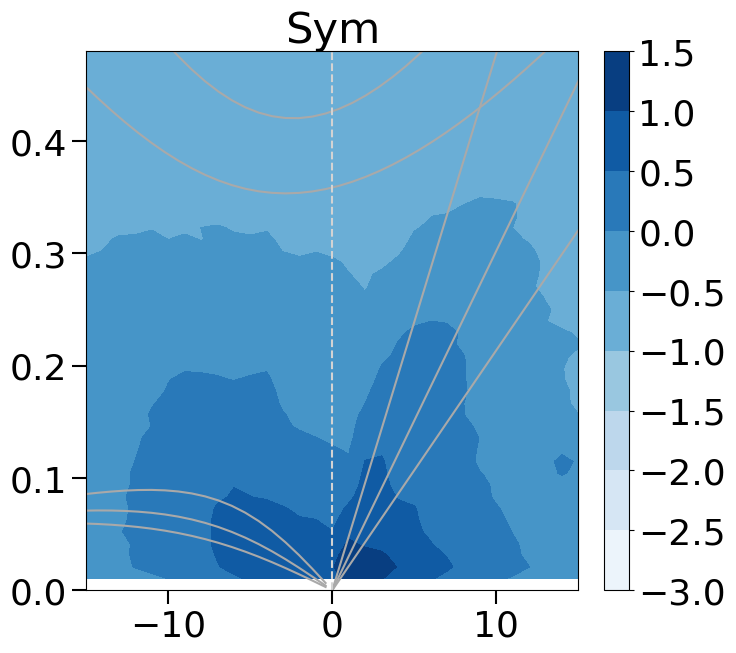

In [9]:
wk.wk_plot_sym(smooth_sym, tlt='Sym', logflg=True, savflg=False, pltDispCurve=True, fb=[0,0.48], center0=False, filename='wk_sym_olr.png', setcolor=False, vmax=None, vmin=None, cmapflg='Blues')
